# Depth and Width Impact

## Import Dataset MNIST

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

X: np.ndarray  # input
y: np.ndarray  # target

# Load data from https://www.openml.org/search?type=data&sort=runs&id=554   
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

 
# MNIST: dataset of 28x28 pixel images of handwritten digits (0-9)
# Input: vector of 784 pixels (28x28)
# Target: number 0-9

In [2]:
X.shape, y.shape

((70000, 784), (70000,))

## Use only 1000 data

In [3]:
X, y = X[:1000], y[:1000]

In [4]:
X, y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(1000, 784)),
 array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3',
        '6', '1', '7', '2', '8', '6', '9', '4', '0', '9', '1', '1', '2',
        '4', '3', '2', '7', '3', '8', '6', '9', '0', '5', '6', '0', '7',
        '6', '1', '8', '7', '9', '3', '9', '8', '5', '9', '3', '3', '0',
        '7', '4', '9', '8', '0', '9', '4', '1', '4', '4', '6', '0', '4',
        '5', '6', '1', '0', '0', '1', '7', '1', '6', '3', '0', '2', '1',
        '1', '7', '9', '0', '2', '6', '7', '8', '3', '9', '0', '4', '6',
        '7', '4', '6', '8', '0', '7', '8', '3', '1', '5', '7', '1', '7',
        '1', '1', '6', '3', '0', '2', '9', '3', '1', '1', '0', '4', '9',
        '2', '0', '0', '2', '0', '2', '7', '1', '8', '6', '4', '1', '6',
        '3', '4', '5', '9', '1', '3', 

### Onehot Encode

In [5]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(X):
    encoder = OneHotEncoder(sparse_output=False)
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    one_hot_encoded = encoder.fit_transform(X)
    return one_hot_encoded

In [6]:
y_encoded = one_hot_encode(y)
print(y_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Manual Plot since the spec changed

In [7]:
import matplotlib.pyplot as plt

def manual_plot_loss_history(train_losses, val_losses):
    """
    Manually plots the training and validation loss history.

    Args:
        train_losses (list of float): List of training losses per epoch.
        val_losses (list of float): List of validation losses per epoch.
    """
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_losses, label="Training Loss", marker='o', color='blue')
    plt.plot(epochs, val_losses, label="Validation Loss", marker='s', color='red')

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss Over Epochs (Manual Input)")
    plt.legend()
    plt.grid(True)
    plt.show()

## Import Model

In [8]:
import sys
import os

# Get the absolute path of the src directory
sys.path.append(os.path.abspath('../')) 

from model.ffnn import FFNN
from graph.visualize import Visualizer

### Testing Pengaruh Depth dan Width

All model uses mse loss function. The last layer always uses relu and the rest uses sigmoid. Weight uses normal distribution.

#### a. Pengaruh Depth
For this part will add more depth with each layer having the same amount of width which is 10.

##### 1) Depth = 2, Width = 10

In [ ]:
ffnnA1 = FFNN([784, 10, 10, 10], loss="mse", active=["sigmoid", "sigmoid", "relu"], seed=69, weight="normal", mean=0.5, variance=1)
ffnnA1

Feed Forward Neural Network
> Layers: [784, 10, 10, 10]
> MLP of 3 Layers [
	Layer(label=Hidden-Layer-1, neurons=[
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N1)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N2)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N3)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N4)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N5)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N6)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N7)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N8)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N9)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N10)])
	Layer(label=Hidden-Layer-2, neurons=[
	Neuron(nin=10, activation=sigmoid, label=Hidden-Layer-2_N1)
	Neuron(nin=10, activation=sigmoid, label=Hidden-Layer-2_N2)
	Neuron(nin=10, activation=sigmoid, label=Hidden-Layer-2_N3)
	Neuron(nin=10, activation=sigmoid, labe

In [ ]:
lossA1, lossA1_history = ffnnA1.training(X, y_encoded, 20, 0.01, 5, 1, 0.8)

  0%|          | 0/5 [00:00<?, ?it/s]

Starting Epoch 0


 20%|██        | 1/5 [04:39<18:39, 279.82s/it]

Training Loss: 74.93193990485591
Validation Loss: 71.67604055950052

Starting Epoch 1


 40%|████      | 2/5 [10:34<16:10, 323.63s/it]

Training Loss: 71.67568316223442
Validation Loss: 68.56179332820858

Starting Epoch 2


 60%|██████    | 3/5 [16:55<11:39, 349.96s/it]

Training Loss: 68.5610863941962
Validation Loss: 65.58303558201584

Starting Epoch 3


 80%|████████  | 4/5 [22:52<05:52, 352.66s/it]

Training Loss: 65.58198679889037
Validation Loss: 62.73387279878433

Starting Epoch 4


100%|██████████| 5/5 [29:08<00:00, 349.73s/it]

Training Loss: 62.73248968509594
Validation Loss: 60.008666898982376



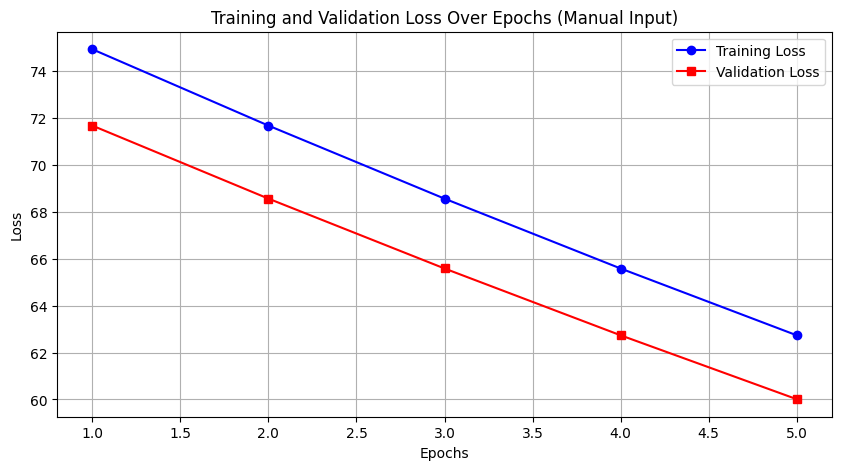

In [11]:
train_losses = [74.93193990485591, 71.675683162234427, 68.5610863941962, 65.58198679889037, 62.73248968509594]
val_losses = [71.67604055950052, 68.56179332820858, 65.58303558201584, 62.73387279878433, 60.008666898982376]

manual_plot_loss_history(train_losses, val_losses)

##### 2) Depth = 3, Width = 10

In [ ]:
ffnnA2 = FFNN([784, 10, 10, 10, 10], loss="mse", active=["sigmoid", "sigmoid", "sigmoid", "relu"], seed=69, weight="normal", mean=0.5, variance=1)
ffnnA2

Feed Forward Neural Network
> Layers: [784, 10, 10, 10, 10]
> MLP of 4 Layers [
	Layer(label=Hidden-Layer-1, neurons=[
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N1)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N2)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N3)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N4)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N5)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N6)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N7)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N8)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N9)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N10)])
	Layer(label=Hidden-Layer-2, neurons=[
	Neuron(nin=10, activation=sigmoid, label=Hidden-Layer-2_N1)
	Neuron(nin=10, activation=sigmoid, label=Hidden-Layer-2_N2)
	Neuron(nin=10, activation=sigmoid, label=Hidden-Layer-2_N3)
	Neuron(nin=10, activation=sigmoid, 

In [ ]:
lossA2, lossA2_history = ffnnA2.training(X, y_encoded, 20, 0.01, 5, 1, 0.8)

  0%|          | 0/5 [00:00<?, ?it/s]

Starting Epoch 0


 20%|██        | 1/5 [04:53<19:34, 293.64s/it]

Training Loss: 74.93190883071136
Validation Loss: 71.67601204821523

Starting Epoch 1


 40%|████      | 2/5 [10:41<16:16, 325.43s/it]

Training Loss: 71.67565465108737
Validation Loss: 68.56176721663381

Starting Epoch 2


 60%|██████    | 3/5 [16:33<11:15, 337.84s/it]

Training Loss: 68.56106028289224
Validation Loss: 65.58301171626543

Starting Epoch 3


 80%|████████  | 4/5 [22:33<05:46, 346.27s/it]

Training Loss: 65.58196293353575
Validation Loss: 62.73385103373885

Starting Epoch 4


100%|██████████| 5/5 [28:30<00:00, 342.06s/it]

Training Loss: 62.732467920566926
Validation Loss: 60.00864709782901



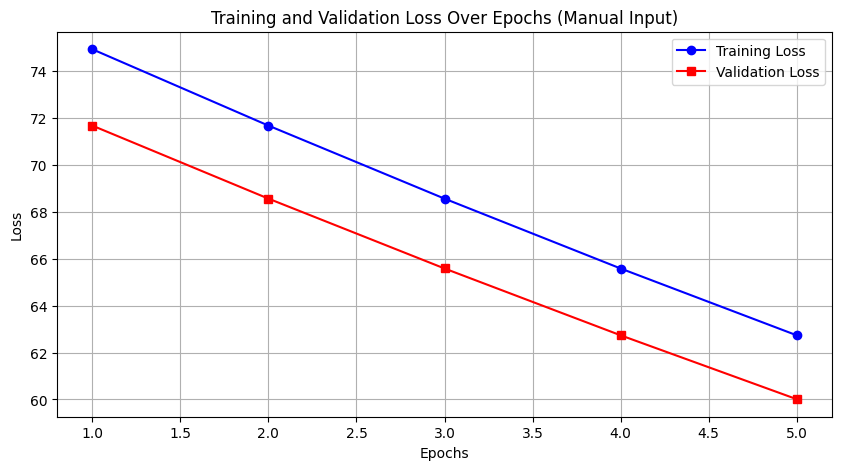

In [12]:
train_losses = [74.93190883071136, 71.67565465108737, 68.56106028289224, 65.58196293353575, 62.732467920566926]
val_losses = [71.67601204821523, 68.56176721663381, 65.58301171626543, 62.73385103373885, 60.00864709782901]

manual_plot_loss_history(train_losses, val_losses)

##### 3) Depth = 4, Width = 10

In [8]:
ffnnA3 = FFNN([784, 10, 10, 10, 10, 10], loss="mse", active=["sigmoid", "sigmoid", "sigmoid", "sigmoid", "relu"], seed=69, weight="normal", mean=0.5, variance=1)
ffnnA3

Feed Forward Neural Network
> Layers: [784, 10, 10, 10, 10, 10]
> MLP of 5 Layers [
	Layer(label=Hidden-Layer-1, neurons=[
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N1)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N2)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N3)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N4)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N5)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N6)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N7)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N8)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N9)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N10)])
	Layer(label=Hidden-Layer-2, neurons=[
	Neuron(nin=10, activation=sigmoid, label=Hidden-Layer-2_N1)
	Neuron(nin=10, activation=sigmoid, label=Hidden-Layer-2_N2)
	Neuron(nin=10, activation=sigmoid, label=Hidden-Layer-2_N3)
	Neuron(nin=10, activation=sigmo

In [9]:
lossA3, lossA3_history = ffnnA3.training(X, y_encoded, 20, 0.01, 5, 1, 0.8)

  0%|          | 0/5 [00:00<?, ?it/s]

Starting Epoch 0


 20%|██        | 1/5 [05:40<22:41, 340.31s/it]

Training Loss: 74.93190878902904
Validation Loss: 71.67601200997053

Starting Epoch 1


 40%|████      | 2/5 [13:00<19:57, 399.32s/it]

Training Loss: 71.67565461284316
Validation Loss: 68.56176718160798

Starting Epoch 2


 60%|██████    | 3/5 [20:40<14:13, 426.69s/it]

Training Loss: 68.56106024786729
Validation Loss: 65.58301168425386

Starting Epoch 3


 80%|████████  | 4/5 [28:31<07:24, 444.42s/it]

Training Loss: 65.58196290152316
Validation Loss: 62.733851004545606

Starting Epoch 4


100%|██████████| 5/5 [36:28<00:00, 437.75s/it]

Training Loss: 62.732467891372316
Validation Loss: 60.008647071266864



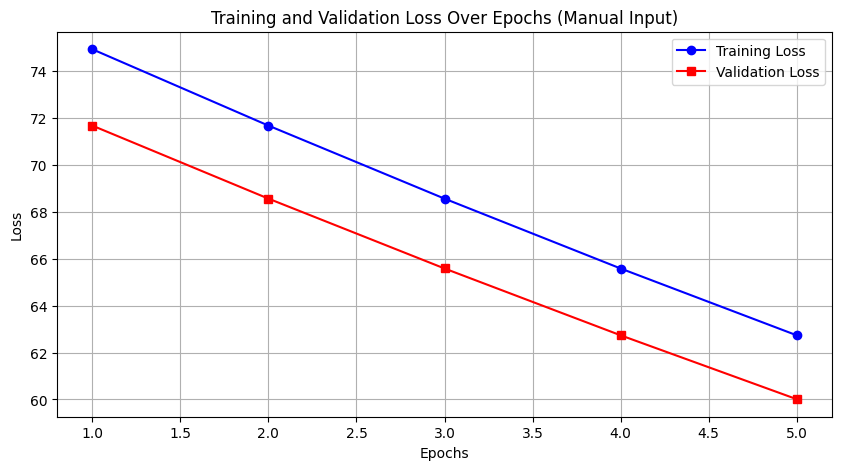

In [13]:
train_losses = [74.93190878902904, 71.67565461284316, 68.56106024786729, 65.58196290152316, 62.732467891372316]
val_losses = [71.67601204821523, 68.56176718160798, 65.58301168425386, 62.733851004545606, 60.008647071266864]

manual_plot_loss_history(train_losses, val_losses)

#### b. Width Impact
for this part we will only change one layer's depth which is the middle layer.

##### 1) Depth = 1, Width = 5

In [12]:
ffnnB3 = FFNN([784, 5, 10], loss="mse", active=["sigmoid", "relu"], seed=69, weight="normal", mean=0.5, variance=1)
ffnnB3

Feed Forward Neural Network
> Layers: [784, 5, 10]
> MLP of 2 Layers [
	Layer(label=Hidden-Layer-1, neurons=[
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N1)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N2)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N3)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N4)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N5)])
	Layer(label=Output-Layer, neurons=[
	Neuron(nin=5, activation=relu, label=Output-Layer_N1)
	Neuron(nin=5, activation=relu, label=Output-Layer_N2)
	Neuron(nin=5, activation=relu, label=Output-Layer_N3)
	Neuron(nin=5, activation=relu, label=Output-Layer_N4)
	Neuron(nin=5, activation=relu, label=Output-Layer_N5)
	Neuron(nin=5, activation=relu, label=Output-Layer_N6)
	Neuron(nin=5, activation=relu, label=Output-Layer_N7)
	Neuron(nin=5, activation=relu, label=Output-Layer_N8)
	Neuron(nin=5, activation=relu, label=Output-Layer_N9)
	Neuron(nin=5, activation=relu, label=Output-L

In [ ]:
lossB3, lossB3_history = ffnnB3.training(X, y_encoded, 20, 0.01, 5, 1, 0.8)

  0%|          | 0/5 [00:00<?, ?it/s]

Starting Epoch 0


 20%|██        | 1/5 [02:42<10:49, 162.42s/it]

Training Loss: 6.710846788541321
Validation Loss: 6.552904019553916

Starting Epoch 1


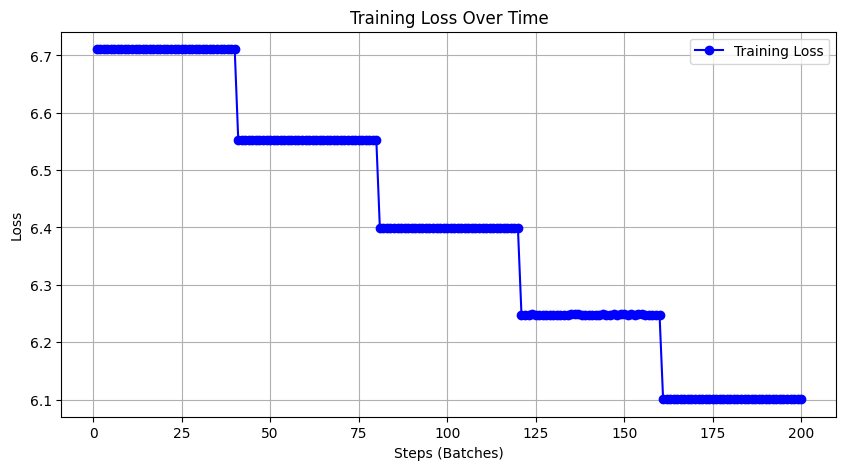

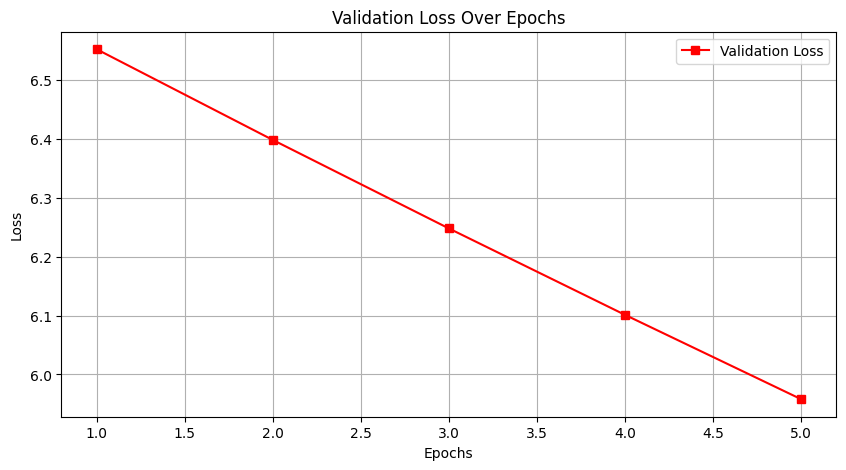

In [11]:
Visualizer.plot_loss_history(lossB3_history)

##### 2) Depth = 1, Width = 12

In [ ]:
ffnnB2 = FFNN([784, 12, 10], loss="mse", active=["sigmoid", "relu"], seed=69, weight="normal", mean=0.5, variance=1)
ffnnB2

In [ ]:
lossB2, lossB2_history = ffnnB2.training(X, y_encoded, 20, 0.01, 5, 1, 0.8)

In [ ]:
Visualizer.plot_loss_history(lossB2_history)

##### 3) Depth = 1, Width = 20

In [14]:
ffnnB1 = FFNN([784, 20, 10], loss="mse", active=["sigmoid", "relu"], seed=69, weight="normal", mean=0.5, variance=1)
ffnnB1

Feed Forward Neural Network
> Layers: [784, 20, 10]
> MLP of 2 Layers [
	Layer(label=Hidden-Layer-1, neurons=[
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N1)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N2)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N3)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N4)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N5)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N6)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N7)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N8)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N9)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N10)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N11)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N12)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N13)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N14)
	Neuron(nin=784,

In [15]:
lossB1, lossB1_history = ffnnB1.training(X, y_encoded, 20, 0.01, 5, 1, 0.8)

  0%|          | 0/5 [00:00<?, ?it/s]

Starting Epoch 0


 20%|██        | 1/5 [10:54<43:36, 654.08s/it]

Training Loss: 79.71934376451574
Validation Loss: 73.17096966269735

Starting Epoch 1


 40%|████      | 2/5 [27:15<42:19, 846.52s/it]

Training Loss: 73.17028716269677
Validation Loss: 67.16113511458447

Starting Epoch 2


 60%|██████    | 3/5 [44:45<31:19, 939.68s/it]

Training Loss: 67.15979877958542
Validation Loss: 61.645551628076

Starting Epoch 3


 80%|████████  | 4/5 [1:01:02<15:54, 954.45s/it]

Training Loss: 61.643588919147554
Validation Loss: 56.58357286794678

Starting Epoch 4


100%|██████████| 5/5 [1:18:18<00:00, 939.74s/it]

Training Loss: 56.58101009279244
Validation Loss: 51.93789513740076



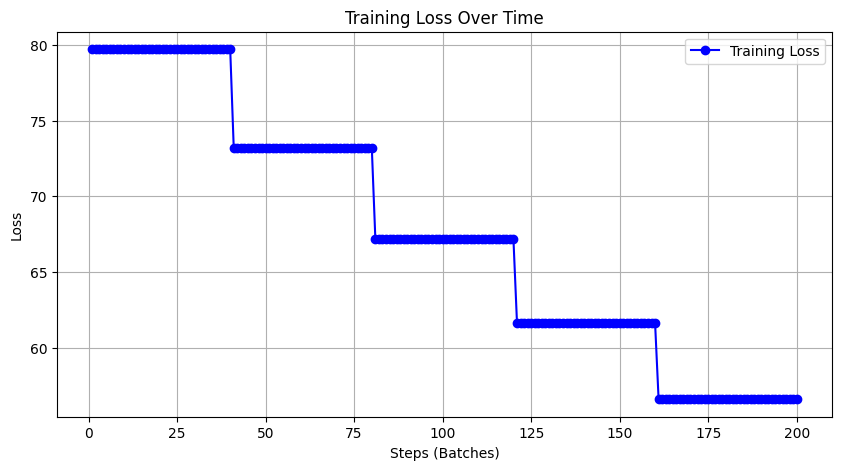

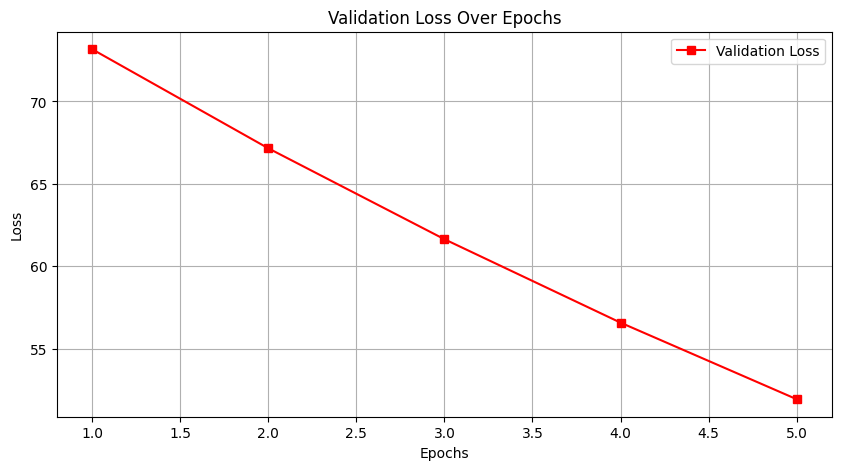

In [16]:
Visualizer.plot_loss_history(lossB1_history)